In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats
import numpy as np

In [3]:
df = pd.read_excel("0718_2000Microns2ndMsmt.xlsx")
df

,Unnamed: 0,Cab.Bridge,Voltage steps,V(PZT),V(PZT).1,Voltage difference,real_V,M-E Sensor,ME_D,ME_A_dis,Fringes,Fringe_D,fringe_A_dis,Time
0,NaN,(bit),NaN,(monitor)(before entering code),(after entering code),NaN,NaN,(microns),NaN,NaN,NaN,NaN,NaN,NaN
1,Balance C-Bridge: $H:Z^,29410,NaN,-0.001,0.498,NaN,4.98,1854.59,NaN,NaN,NaN,NaN,NaN,13:32:00
2,$H:S:29410:2:29810:70^,29810,400.0,0.512,1.554,1.056,15.54,1856.51,1.92,1.92,17.0,5.3788,5.3788,13:38:00
3,NaN,30210,400.0,1.541,2.357,0.803,23.57,1867.7,11.19,13.11,21.0,6.6444,12.0232,13:40:00
4,NaN,30610,400.0,2.306,3.068,0.711,30.68,1874.31,6.61,19.72,21.0,6.6444,18.6676,13:42:00
5,NaN,31010,400.0,3.018,3.82,0.752,38.20,1880.98,6.67,26.39,26.0,8.2264,26.8940,13:47:00
6,NaN,31410,400.0,3.769,4.53,0.710,45.30,1887.68,6.70,33.09,21.0,6.6444,33.5384,13:49:00
7,NaN,31810,400.0,4.48,5.23,0.700,52.30,1894.42,6.74,39.83,23.0,7.2772,40.8156,01:51:00
8,NaN,32210,400.0,5.17,5.94,0.710,59.40,1901.17,6.75,46.58,20.0,6.3280,47.1436,01:53:00
9,NaN,32610,400.0,5.86,6.65,0.710,66.50,1907.97,6.80,53.38,23.0,7.2772,54.4208,01:55:00


In [46]:
ME_A_dis = df["ME_A_dis"][2:27]
print(ME_A_dis)

2      1.92
3     13.11
4     19.72
5     26.39
6     33.09
7     39.83
8     46.58
9     53.38
10    60.28
11    68.26
12    76.27
13    68.25
14    60.26
15    53.33
16    46.53
17    39.77
18    33.02
19    26.32
20    19.63
21    13.01
22     6.45
23    -0.08
24    -6.56
25   -13.01
26   -20.26
Name: ME_A_dis, dtype: float64


In [47]:
fringe_A_dis = df["fringe_A_dis"][2:27]
print(fringe_A_dis)

2      5.3788
3     12.0232
4     18.6676
5     26.8940
6     33.5384
7     40.8156
8     47.1436
9     54.4208
10    61.0652
11    68.6588
12    76.8852
13    68.3424
14    59.7996
15    52.5224
16    44.9288
17    37.6516
18    31.3236
19    24.3628
20    18.3512
21    11.0740
22     4.4296
23    -2.2148
24    -7.9100
25   -14.8708
26   -22.1480
Name: fringe_A_dis, dtype: float64


In [48]:
real_V = df["real_V"][2:27]
print(real_V)

2     15.54
3     23.57
4     30.68
5     38.20
6     45.30
7     52.30
8     59.40
9     66.50
10    73.30
11    82.00
12    90.50
13    74.80
14    62.30
15    52.70
16    43.80
17    35.65
18    27.92
19    20.69
20    13.75
21     7.19
22     0.94
23    -5.09
24   -11.03
25   -16.70
26   -22.93
Name: real_V, dtype: float64


In [49]:
x = fringe_A_dis
y = ME_A_dis

In [50]:
info = stats.linregress(x,y)
info

LinregressResult(slope=0.9777483293403508, intercept=1.2428150995439253, rvalue=0.9989019579909538, pvalue=4.395579412006263e-32, stderr=0.009561929222051102, intercept_stderr=0.3865142350486908)

<IPython.core.display.Javascript object>


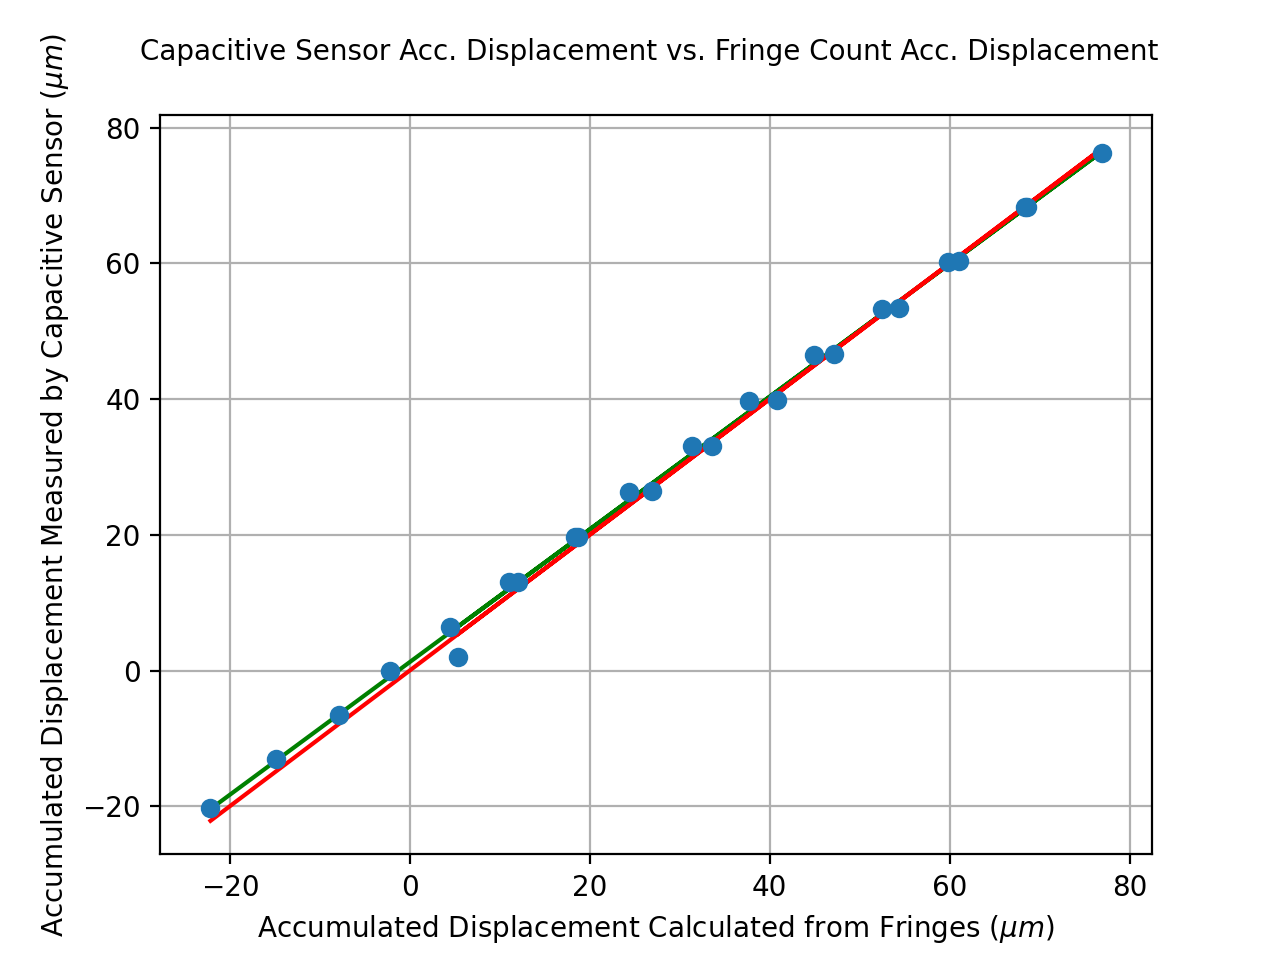

<function matplotlib.pyplot.show(block=None)>

In [55]:
#x error is 0.6
xerror = np.full_like(x,0.6)
yerror = np.full_like(y,0)

# plot of linear regression of data
plt.plot(x,x*info.slope+info.intercept,c = "green")

# plot of fringe displacement data, our "true" measurement
plt.plot(x,x,c = "red")

plt.errorbar(x,y,xerr=xerror,yerr=yerror,fmt = 'o')#,c = "orange")


plt.xlabel('Accumulated Displacement Calculated from Fringes ($\mu m$)')
plt.ylabel('Accumulated Displacement Measured by Capacitive Sensor ($\mu m$)')

t = 'Capacitive Sensor Acc. Displacement vs. Fringe Count Acc. Displacement'
plt.text(-30, 90, t, ha='left', rotation=0, wrap=True)



plt.grid()
plt.show

<IPython.core.display.Javascript object>


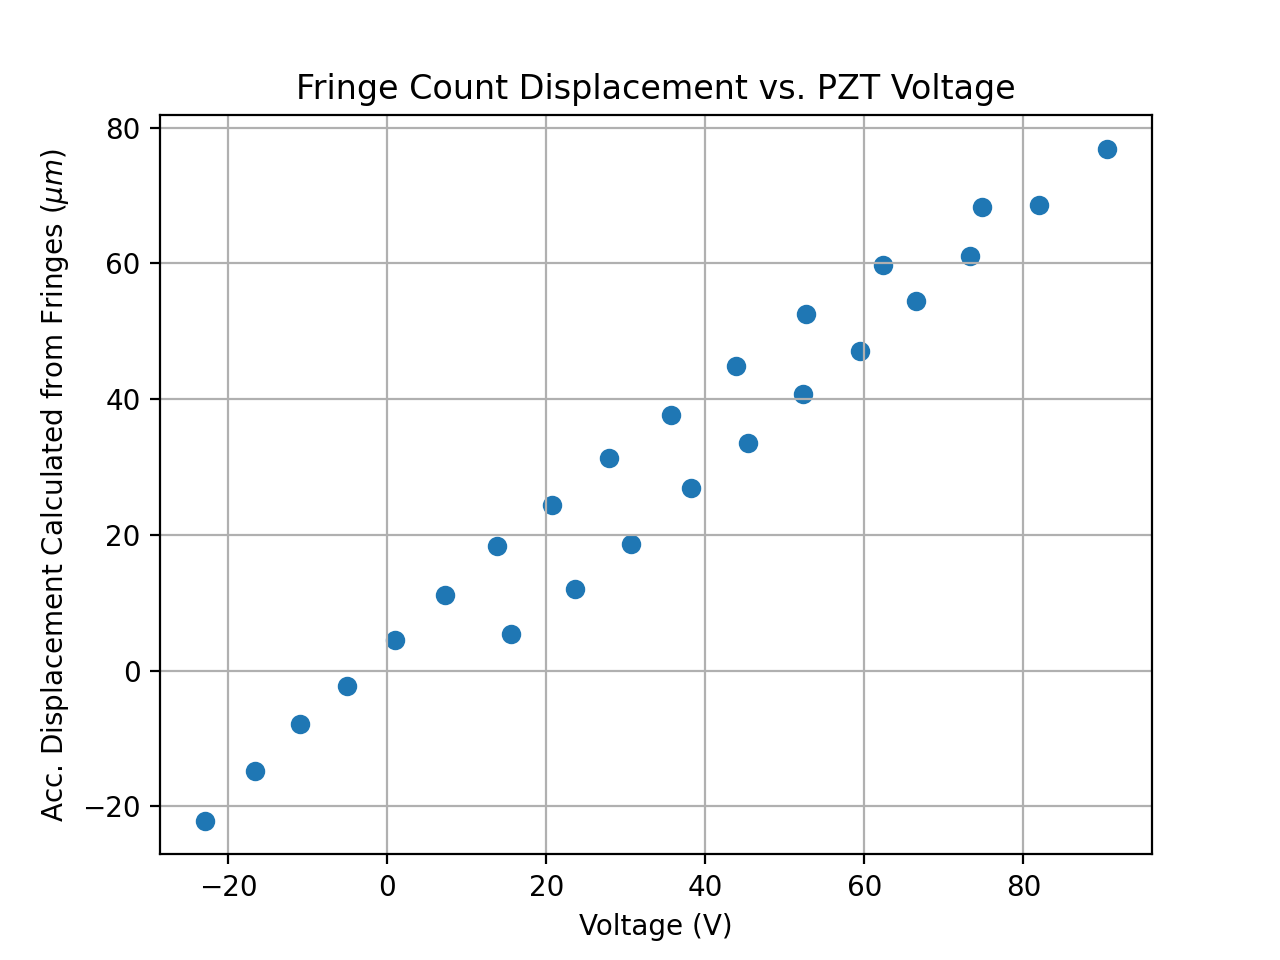

<function matplotlib.pyplot.show(block=None)>

In [56]:
plt.close("all")
x = real_V
y = fringe_A_dis

plt.scatter(x,y)


plt.xlabel('Voltage (V)')
plt.ylabel('Acc. Displacement Calculated from Fringes ($\mu m$)')
plt.title('Fringe Count Displacement vs. PZT Voltage')


plt.grid()
plt.show